<h1>IRT (data lama)</h1>

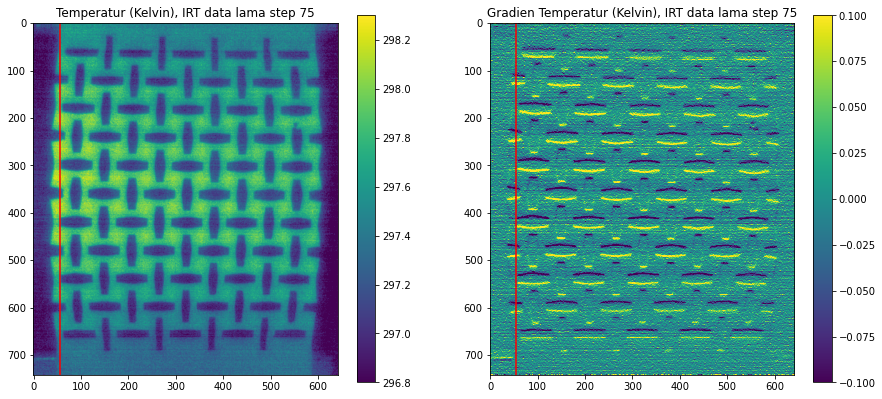

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# baca data temp
data = scipy.io.loadmat('auxetic_data.mat')
irt_data = data['Data_IRT']
temp_img = irt_data[:,:,75]

# calc gradient
temp_grad = np.gradient(temp_img, edge_order = 2)

# setup subplot
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=[15,9])

# plot info
ax1.set_title('Temperatur (Kelvin), IRT data lama step 75')
ax2.set_title('Gradien Temperatur (Kelvin), IRT data lama step 75')

# plot
im1 = ax1.imshow(temp_img,vmin=296.8, vmax=298.3)
fig.colorbar(im1, ax=ax1, shrink=0.75)

im2 = ax2.imshow(temp_grad[0], vmin=-0.1, vmax=0.1)
fig.colorbar(im2, ax=ax2, shrink=0.75)

# slice
ax1.axvline(x=55,ymin=0,ymax=1,color='red')
ax2.axvline(x=55,ymin=0,ymax=1,color='red')

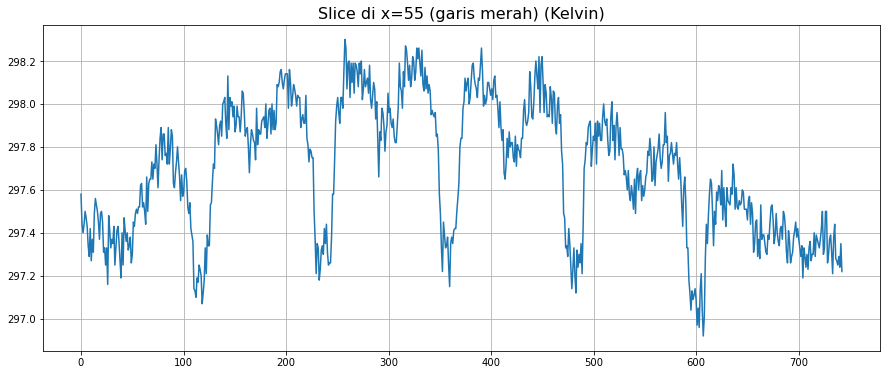

In [5]:
temp_slice = temp_img[:,55]
x_val = np.linspace(0,len(temp_slice),len(temp_slice))

plt.figure(figsize=[15,6])

plt.title('Slice di x=55 (garis merah) (Kelvin)', fontdict={
    'fontsize': 16,
})
plt.grid()
plt.plot(x_val,temp_slice)

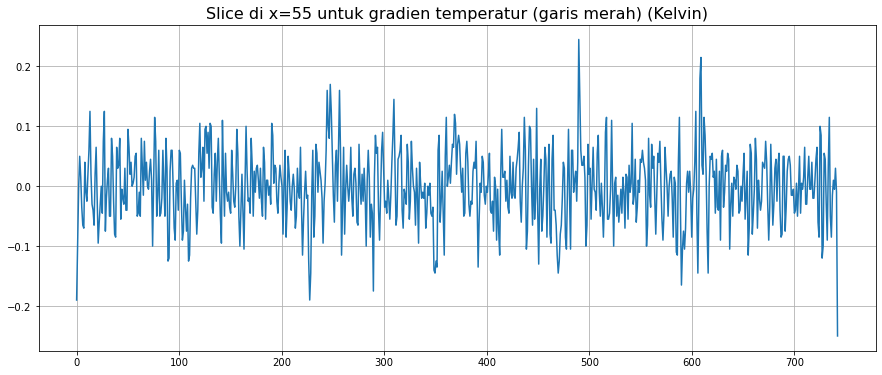

In [8]:
temp_grad_slice = temp_grad[0][:,55]
x_val = np.linspace(0,len(temp_slice),len(temp_slice))

plt.figure(figsize=[15,6])
plt.plot(x_val,temp_grad_slice)

plt.title('Slice di x=55 untuk gradien temperatur (garis merah) (Kelvin)', fontdict={
    'fontsize': 16
})

plt.grid()

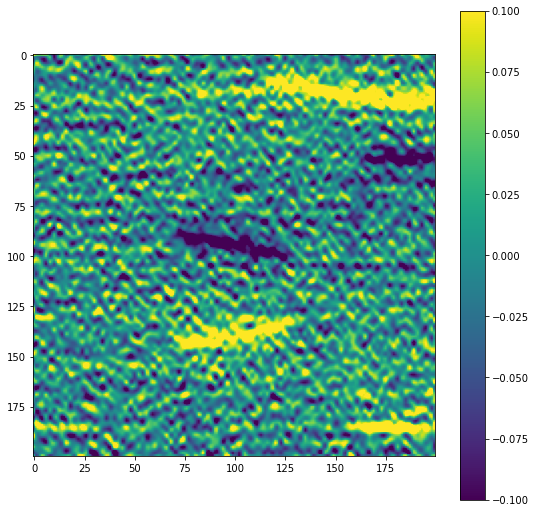

In [104]:
test = temp_grad[0][300:400,0:100]
x_len = np.shape(test[0,:])[0]
y_len = np.shape(test[:,0])[0]

x_range = np.linspace(0,x_len-1,x_len)
y_range = np.linspace(0,y_len-1,y_len)

temp_grad_interp = interpolate.RectBivariateSpline(x_range,y_range,test)

x_range_new = np.linspace(0,x_len-1,200)
y_range_new = np.linspace(0,y_len-1,200)

temp_grad_new = temp_grad_interp(x_range_new, y_range_new)

plt.figure(figsize=[9,9])

plt.imshow(temp_grad_new)
plt.colorbar()
plt.clim(-0.1, 0.1)
